# Análisis exploratorio de Datos para correlación entre el consumo de café y el estado de salud de las personas

##### The GlobalCoffeeHealth dataset contains 10,000 synthetic records reflecting real-world patterns of coffee consumption, sleep behavior, and health outcomes across 20 countries. It includes demographics, daily coffee intake, caffeine levels, sleep duration and quality, BMI, heart rate, stress, physical activity, health issues, occupation, smoking, and alcohol consumption.

##### The dataset captures realistic correlations observed in research—such as caffeine’s impact on sleep, stress, and health—making it ideal for statistical analysis, predictive modeling, and lifestyle or wellness studies.

# Objetivo del estudio

### Objetivo general
##### Explorar la relación entre el consumo de café, los hábitos de vida y la salud, con el fin de identificar los principales indicadores de salud afectados, evaluar la interacción con otros factores de riesgo o protección, y determinar un rango de consumo de café que resulte más saludable para la población analizada.
### Objetivos específicos
##### Analizar qué indicadores de salud (sueño, calidad del sueño, IMC, frecuencia cardíaca, nivel de estrés) se ven más afectados por un alto consumo de café, y determinar la naturaleza de esas relaciones.
##### Explorar cómo factores asociados al estilo de vida, como el hábito de fumar, el consumo de alcohol y la actividad física, pueden potenciar o mitigar los efectos del consumo de café sobre la salud.
##### Estimar un nivel promedio de consumo de café que permita minimizar impactos negativos sobre indicadores de salud, identificando un rango considerado “seguro” o no perjudicial.

In [86]:
import os
from dotenv import load_dotenv

load_dotenv()

data_path = os.getenv("DATA_PATH")
notebook_path = os.getenv("NOTEBOOK_PATH")

print("Ruta dataset:", data_path)
print("Ruta notebook:", notebook_path)

Ruta dataset: C:/Users/Usuario/Desktop/Python/prueba/FundamentosDeProgramacion/TALLERES/Taller3/Datasynthetic_coffee_health_10000.csv
Ruta notebook: C:/Users/Usuario/Desktop/Python/prueba/FundamentosDeProgramacion/TALLERES/Taller3/GlobalCoffeeHealth/GlobalCoffeeHealthEDA.ipynb


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### Importando datos

In [17]:
data = pd.read_csv("C:\\Users\\Usuario\\Desktop\\Python\\prueba\\FundamentosDeProgramacion\\TALLERES\\Taller3\\Data\\synthetic_coffee_health_10000.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Limpieza de base de datos

In [18]:
print("Valores nulos por columna:\n", data.isnull().sum())
print("\nNúmero de duplicados:", data.duplicated().sum())

data.dtypes

Valores nulos por columna:
 ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

Número de duplicados: 0


ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

### Transformaciones propuestas

In [19]:
categoricos = ["Gender", "Country", "Sleep_Quality", 
                    "Stress_Level", "Health_Issues", "Occupation"]
for col in categoricos:
    data[col] = data[col].astype("category")

binarios = ["Smoking", "Alcohol_Consumption"]
for col in binarios:
    data[col] = data[col].astype(int)

def BMI(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

data["BMI_Category"] = data["BMI"].apply(BMI).astype("category")

print(data.head())

   ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption BMI_Category  
0           NaN      Other        0         

### Análisis preliminar

In [20]:
data.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [21]:
data[categoricos + ["BMI_Category"]].describe()

,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation,BMI_Category
count,10000,10000,10000,10000,4059,10000,10000
unique,3,20,4,3,3,5,4
top,Female,Canada,Good,Low,Mild,Office,Normal
freq,5001,543,5637,6989,3579,2073,5117


##### Se procede a organizar datos sobre el consumo de café y la calidad de sueño de la población 
##### - El consumo de café nos da la cantidad de tazas de café al día 
##### - Las horas de sueño nos da el dato numérico de la cantidad de sueño al día.

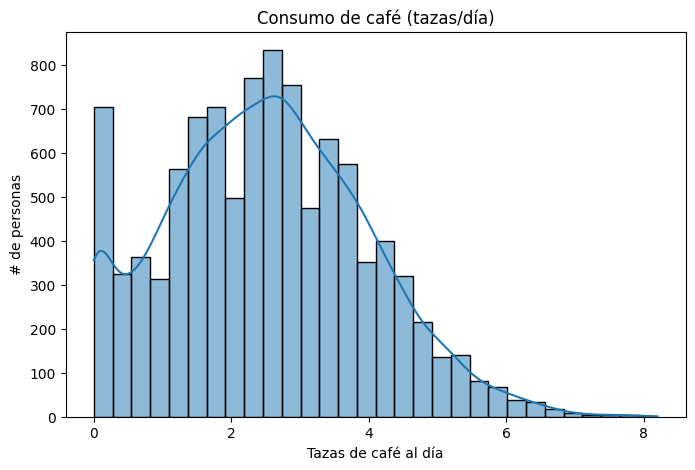

In [ ]:
# Distribución de consumo de café
plt.figure(figsize=(8,5))
sns.histplot(data["Coffee_Intake"], bins=30, kde=True)
plt.title("Consumo de café (tazas/día)")
plt.xlabel("Tazas de café al día")
plt.ylabel("# de personas")
plt.show()

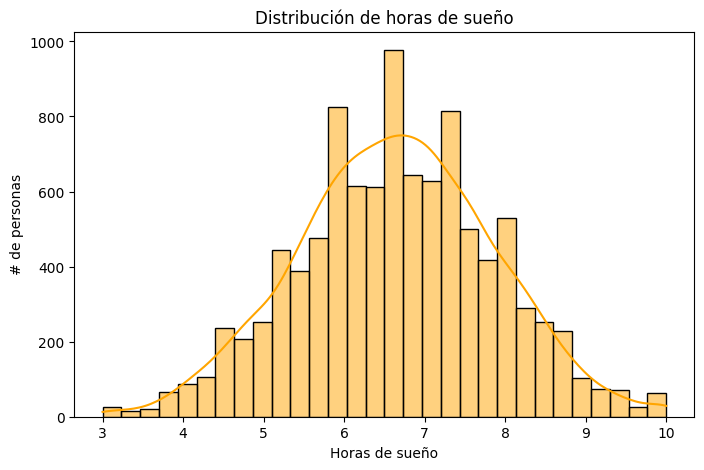

In [24]:
# Distribución de horas de sueño
plt.figure(figsize=(8,5))
sns.histplot(data["Sleep_Hours"], bins=30, kde=True, color="orange")
plt.title("Distribución de horas de sueño")
plt.xlabel("Horas de sueño")
plt.ylabel("# de personas")
plt.show()

##### Ahora, se procede a relacionar el consumo de café con la calidad de sueño

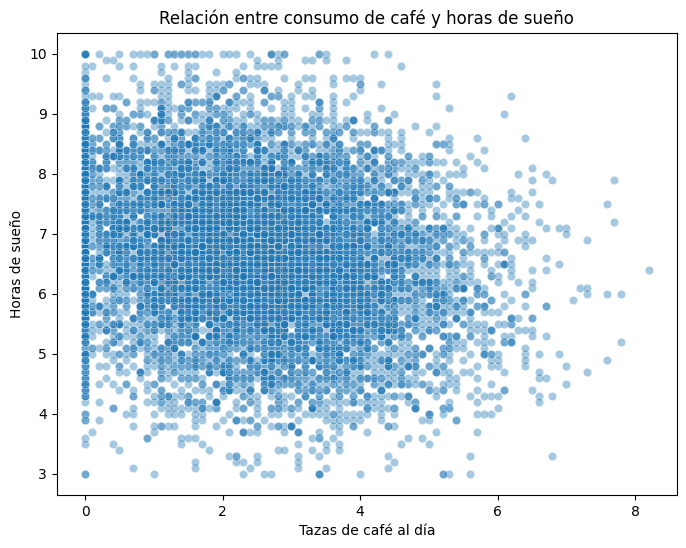

In [25]:
# Relación entre consumo de café y horas de sueño
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Coffee_Intake", y="Sleep_Hours", alpha=0.4)
plt.title("Relación entre consumo de café y horas de sueño")
plt.xlabel("Tazas de café al día")
plt.ylabel("Horas de sueño")
plt.show()


##### Podemos ver que, a través de este scatterplot, los datos están concentrados en personas que no sobrepasan las 5 tazas de café al día, con un rango de horas de sueño que va de 5 a 9 horas. Se puede afirmar que, en general, quienes limitan su consumo de café a unas 4 o 5 tazas diarias no muestran variaciones claras en el número de horas de sueño, o al menos no hay indicios de una relación fuerte entre ambas variables. No es posible confirmar nada respecto a posibles efectos negativos en quienes consumen más de 5 tazas, ya que en ese rango los datos son menos representativos.
##### La linea roja encima de la nube de puntos indica que hay una relación respecto al consumo de café y la cantidad de sueño, una tendecia a dormir menos mientras más se consume. Sin embargo, hay que tomar en cuenta que es una tendencia leve o poco pronunciada debido a la dispersión de la población y a la leve inclinación de la pendiente. 

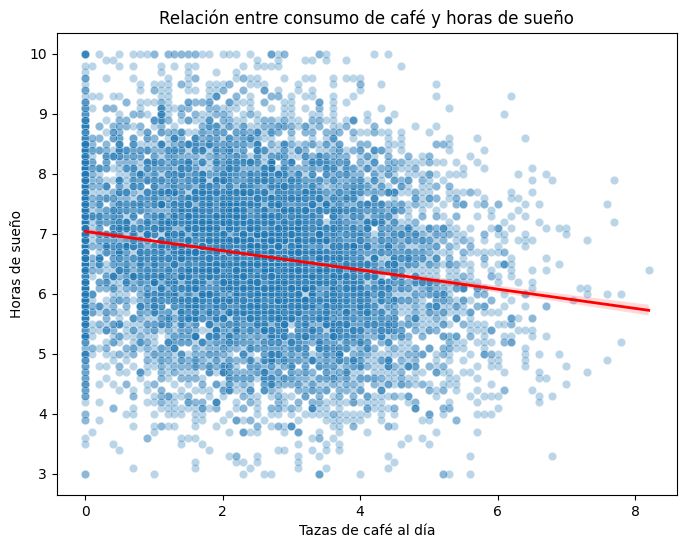

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=data, x="Consumo de café", y="Sleep_Hours", alpha=0.3)

sns.regplot(data=data, x="Consumo de café", y="Sleep_Hours", 
            scatter=False, color="red", line_kws={"lw":2})

plt.title("Relación entre consumo de café y horas de sueño")
plt.xlabel("Tazas de café al día")
plt.ylabel("Horas de sueño")
plt.show()

##### También se procede a hacer la relación entre el consumo de café con demás indicadores para verificar qué tan impactante es en otros factores de salud

In [62]:
# Renombramiento de columnas
data = data.rename(columns={
    "Coffee_Intake": "Consumo de café",
    "BMI": "IMC",
    "Heart_Rate": "Frecuencia cardiaca",
    "Sleep_Quality": "Calidad de sueño",
    "Caffeine_mg": "Cafeína (mg)",
    "Sleep_Hours": "Horas de sueño"
})


##### - IMC nos da el dato de índice de masa corporal
##### - La frecuencia cardiaca nos da el dato de latidos por minuto
##### - La calidad de sueño nos da el dato categórico de la calidad de sueño al día ("poor, good, fair and excellent")
##### - Cafeína da la cantidad numérica de mg de cafeína al día

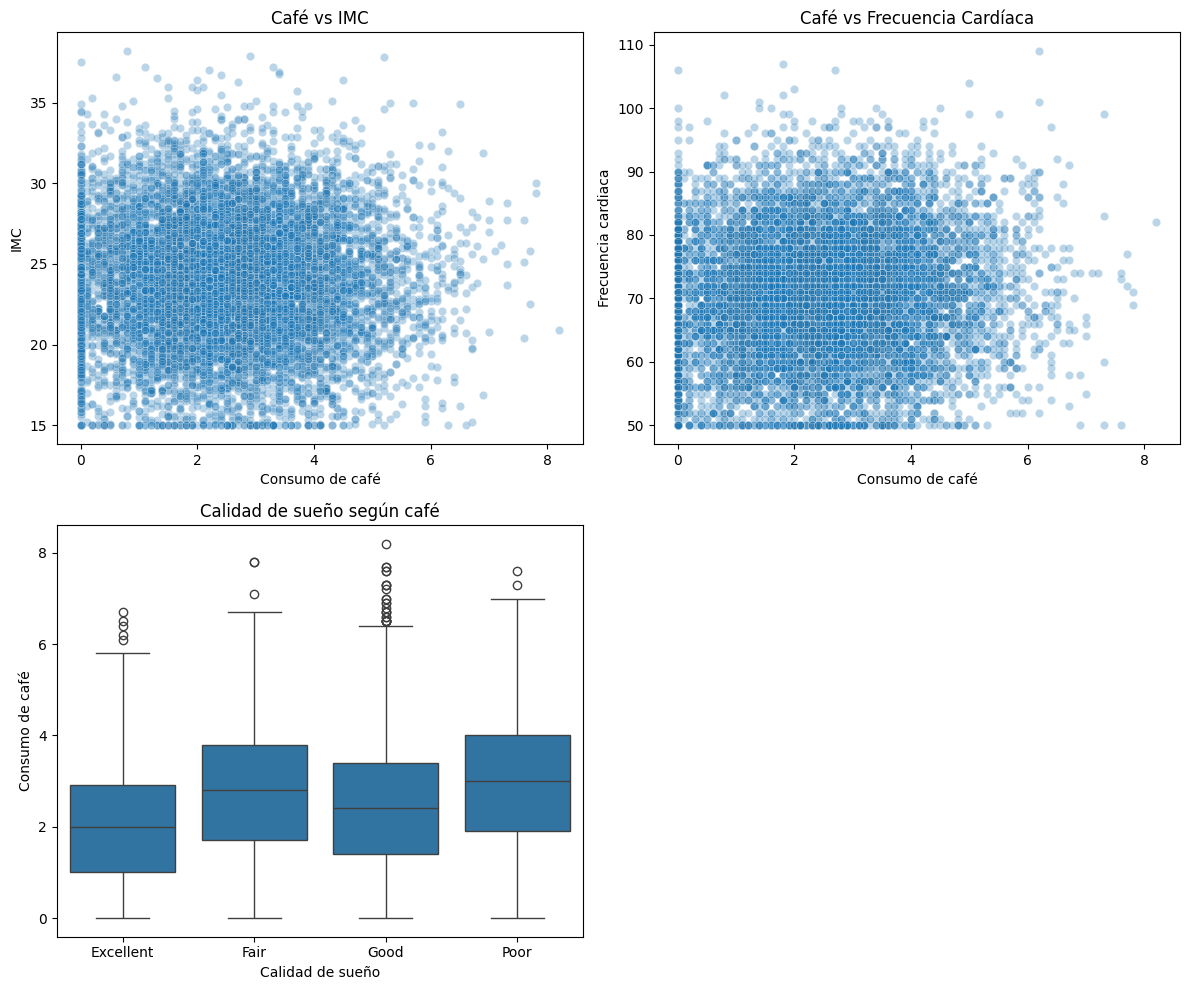

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(data=data, x="Consumo de café", y="IMC", alpha=0.3, ax=axes[0,0])
axes[0,0].set_title("Café vs IMC")

sns.scatterplot(data=data, x="Consumo de café", y="Frecuencia cardiaca", alpha=0.3, ax=axes[0,1])
axes[0,1].set_title("Café vs Frecuencia Cardíaca")

sns.boxplot(data=data, x="Calidad de sueño", y="Consumo de café", ax=axes[1,0])
axes[1,0].set_title("Calidad de sueño según café")

fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

##### Respecto al diagrama de caja y bigotes, se refuerza la conclusión de la tendencia que relaciona el alto consumo de café con pocas horas de sueño. Podemos ver que la caja de la categoría "poor" es la más alta con respecto a número de tazas al día. También podemos ver que en la categoría "good" (la que sigue después de "poor"), se tiene la mayor cantidad de valores atípicos relacionados al alto consumo de café, y que la categoría "fair" consume más café que "good", a pesar de la mejor calidad de sueño. Esto también refuerza el hecho de que la tendencia sigue siendo leve.

##### Por otro lado, podemos observar que pasa algo parecido con la relación del café con la frecuencia cardiaca respecto al primer análisis (Consumo de café vs Calidad de sueño): Hay una tendencia leve al aumento de la frecuencia cardiaca respecto al aumento de las tazas de café diarias.

##### Por último, tenemos a la relación del índice de masa corporal con respecto al consumo de café. Se ve que no existe tendencia que relacione el consumo de café con un bajo o alto IMC, a diferencia de las otras relaciones con los otros indicadores de salud.

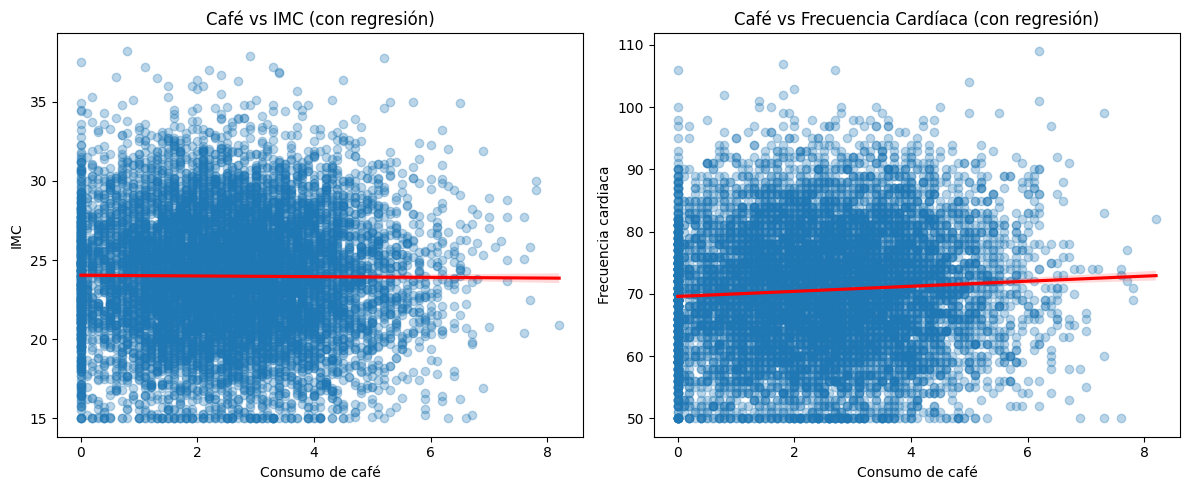

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Café vs IMC con línea de regresión
sns.regplot(data=data, x="Consumo de café", y="IMC",
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_title("Café vs IMC (con regresión)")

# Café vs Frecuencia Cardíaca con línea de regresión
sns.regplot(data=data, x="Consumo de café", y="Frecuencia cardiaca",
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title("Café vs Frecuencia Cardíaca (con regresión)")

plt.tight_layout()
plt.show()

##### Ahora, se crea correlaciones para comprobar qué tan ciertos son los patrones encontrados con el consumo de café

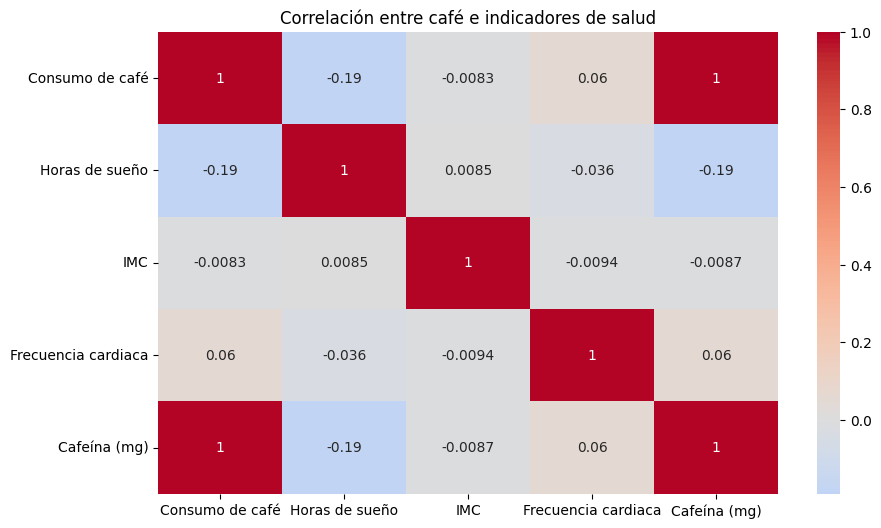

In [65]:
# Correlaciones numéricas con columnas renombradas
plt.figure(figsize=(10,6))
sns.heatmap(
    data[["Consumo de café", "Horas de sueño", "IMC", "Frecuencia cardiaca", "Cafeína (mg)"]].corr(),
    annot=True, cmap="coolwarm", center=0
)
plt.title("Correlación entre café e indicadores de salud")
plt.show()

### Se tiene que la cafeína evidentemente se relaciona de manera directa con el consumo de café. 
### Se concluye también que la cafeína/consumo de café es tiene una relación ligera con la falta de sueño. Aunque tomar café no garantiza dormir menos, hay una tendencia a perder la calidad de sueño. 
### Respecto a la relación entre la cafeína/consumo de café con el índice de masa corporal, se confirma el nulo relacionamiento.
### Por último, la correlación de la cafeína/consumo de café con la frecuencia cardiaca es mucho más debil que la de la falta de sueño, se descarta por irrelevancia. 

In [ ]:
# Renombramiento de columnas
data = data.rename(columns={
    "Smoking": "Fuma",
    "Alcohol_Consumption": "Consumo de alcohol"
})

data["Fuma"] = data["Fuma"].map({0: "No fuma", 1: "Sí fuma"})
data["Consumo de alcohol"] = data["Consumo de alcohol"].map({0: "No consume", 1: "Sí consume"})

### Ahora veremos qué tanto se relacionan otros hábitos que pueden alterar la salud con el consumo de café 

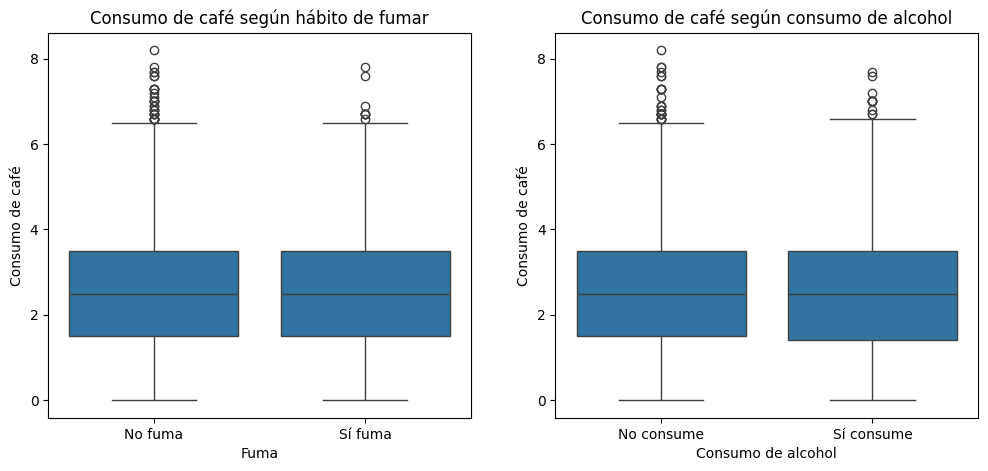

In [71]:
# Café vs fumar/alcohol
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(data=data, x="Fuma", y="Consumo de café", ax=axes[0])
axes[0].set_title("Consumo de café según hábito de fumar")

sns.boxplot(data=data, x="Consumo de alcohol", y="Consumo de café", ax=axes[1])
axes[1].set_title("Consumo de café según consumo de alcohol")

plt.show()

### Ni fumar ni beber alcohol muestran una tendencia respecto al consumo de café

In [75]:
# Renombramiento de columnas
data = data.rename(columns={
    "Physical_Activity_Hours": "Horas de actividad física"
})

### Ahora, analizaremos con otro hábito que, a diferencia de los otros dos analizados, es más característico por mejorar la salud en vez de perjudicarla
### Nota: Tomar en cuenta que esta afirmación NO proviene de un análisis previo. No se vió interes en relacionar consumo del alcohol y el hábito de fumar con las horas de sueño. Los dos hábitos son conocidos por perjudicar otros aspectos en la calidad de vida de las personas

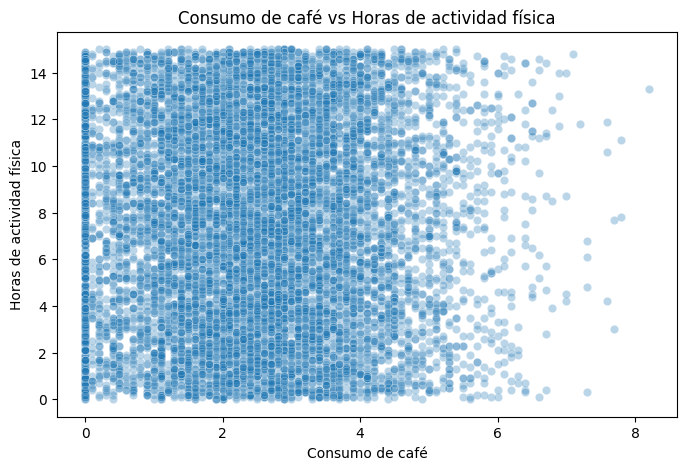

In [76]:
# Relación entre café y actividad física
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x="Consumo de café", y="Horas de actividad física", alpha=0.3)
plt.title("Consumo de café vs Horas de actividad física")
plt.show()

### La gran dispersión de este gráfico también afirma la poca relación que guarda el consumo de café con la actividad física.

### Por último, crearemos unos gráficos que nos ayuden a decidir un máximo nivel de consumo de cafeína/consumo de café antes de que llegue a una probalidad alta de que interferiera con el buen hábito de sueño, mientras se construyen unos gráficos que demuestren la relación insignificante entre la cafeína y la frecuencia cardiaca, y el índice de masa corporal.

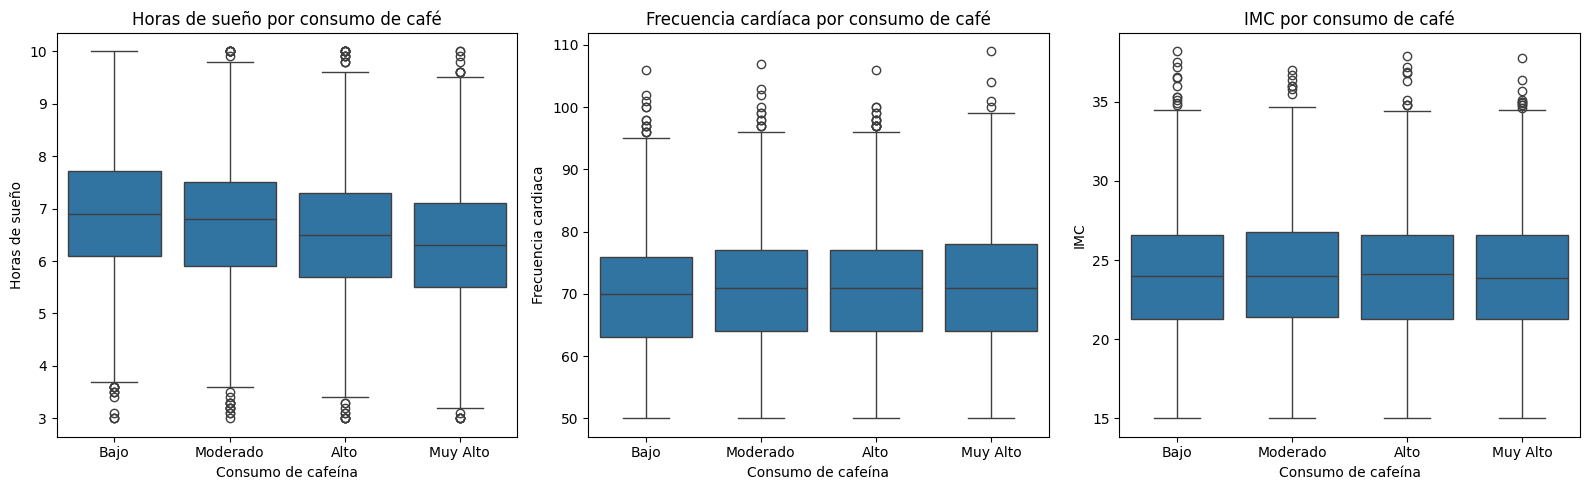

In [79]:
# Boxplots de indicadores clave por cuartiles de consumo de café
data["Consumo de cafeína"] = pd.qcut(data["Consumo de café"], q=4, labels=["Bajo","Moderado","Alto","Muy Alto"])

fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.boxplot(data=data, x="Consumo de cafeína", y="Horas de sueño", ax=axes[0])
axes[0].set_title("Horas de sueño por consumo de café")

sns.boxplot(data=data, x="Consumo de cafeína", y="Frecuencia cardiaca", ax=axes[1])
axes[1].set_title("Frecuencia cardíaca por consumo de café")

sns.boxplot(data=data, x="Consumo de cafeína", y="IMC", ax=axes[2])
axes[2].set_title("IMC por consumo de café")

plt.tight_layout()
plt.show()

### En efecto, solo se puede ver un efecto considerable en la higiene del sueño. Por ende, se decidirá a través del siguiente criterio:

### Muchas investigaciones sugieren que las horas recomendadas de sueño están entre 6 y 8 horas de sueño. Podemos ver que en "bajo" y "moderado" el primer cuartil está encima de las 6 horas, mientras que en "alto" y "muy alto" está abajo. Entonces, para asegurar mínimo 6 horas de sueño para la gran mayoría de la población, se recomienda que el consumo de café no sea alto o muy alto.

In [ ]:
intervalos = pd.qcut(data["Consumo de café"], q=4)
print("Intervalos de consumo de café por cuartil:")
print(intervalos.cat.categories)

Intervalos de consumo de café por cuartil:
IntervalIndex([(-0.001, 1.5], (1.5, 2.5], (2.5, 3.5], (3.5, 8.2]], dtype='interval[float64, right]')

Cantidad de personas en cada grupo:
Coffee_Group
Bajo        2704
Moderado    2476
Alto        2427
Muy Alto    2393
Name: count, dtype: int64


### También, se cuenta como consumo de café alto o muy alto si sobrepasa de 2 tazas de café (>2.5). Por lo tanto, se recomienda no pasar de 2 tazas de café para asegurarnos una higiene de sueño correcta.

# Análisis y conclusiones

### Sueño (horas y calidad):

##### Existe una correlación negativa moderada (-0.19) entre consumo de café/cafeína y horas de sueño.

##### Cerca de un 10% de la población tiene sueño pobre, y estos individuos consumen más café que quienes duermen bien.

### Frecuencia cardíaca:

##### Relación débil pero positiva (+0.06). El consumo elevado de café se asocia con un ligero aumento en el pulso. Sin emabrgo, se considera insignificante.

### IMC:

##### No se observan asociaciones con el consumo de café (correlación cercana a 0).

### Estimación de un rango de consumo de café “seguro”:

##### Impacto negativo sobre sueño empieza a notarse de forma marcada a partir de 3 tazas al día.

##### Quienes consumen menos de 3 tazas al día suelen mantener buen equilibrio entre alerta y descanso.

##### Esto NO significa que no se pueda tener buen hábito del sueño si se pasa de esta cantidad de cafeína, pero asegura que no comience a afectar las horas de sueño según el análisis realizado en esta población

### Conclusión final:

##### Un rango de 1 a 3 tazas de café/día (≈ 100–300 mg cafeína) puede considerarse seguro y saludable para la mayoría de la población. Superar este umbral incrementa el riesgo sobre tener un mal hábito de sueño.